In [30]:
from qiskit import *
IBMQ.save_account('e322c3e1095ebde008d15d068adf82a12cd3ed33a29bdd1c353f5e7fbc89eae4f65314ce0818d5618580eabb4563eb0982495d1ff61e99f9ce61e9ccef2c87bc')

configrc.store_credentials:WARNING:2021-01-28 17:35:13,511: Credentials already present. Set overwrite=True to overwrite.


In [31]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [32]:
circuit = QuantumCircuit(qr, cr)

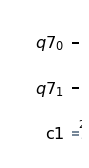

In [33]:
%matplotlib inline
circuit.draw(output='mpl')

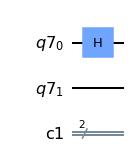

In [34]:
circuit.h(qr[0])
circuit.draw(output='mpl')

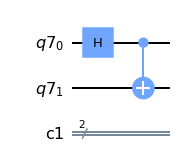

In [35]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

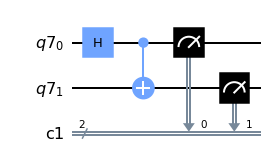

In [36]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [37]:
simulator = Aer.get_backend('qasm_simulator')

In [38]:
result = execute(circuit, backend=simulator).result()

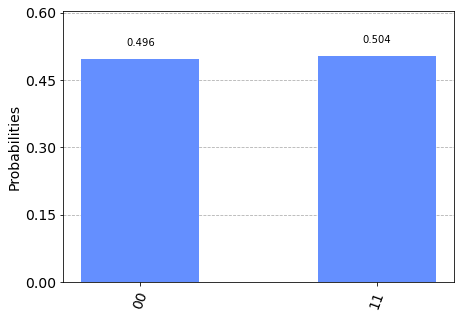

In [39]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [40]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-01-28 17:35:38,469: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [41]:
provider = IBMQ.get_provider('ibm-q')

In [42]:
qcomp = provider.get_backend('ibmq_santiago')

In [44]:
job = execute(circuit, backend=qcomp)

In [45]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


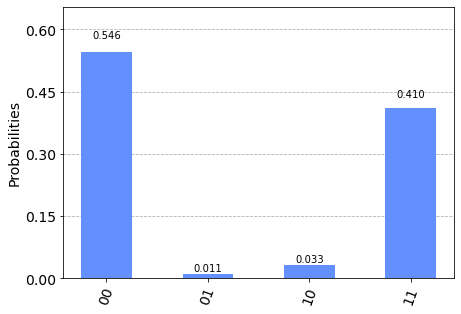

In [46]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [48]:
from qiskit.tools.monitor import backend_overview
backend_overview()

ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 65             Pending Jobs: 68             Pending Jobs: 13
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      113.8          Avg. T1:      79.2           Avg. T1:      151.7
Avg. T2:      110.2          Avg. T2:      92.1           Avg. T2:      247.3



ibmq_16_melbourne            ibmqx2                       ibmq_vigo
-----------------            ------                       ---------
Num. Qubits:  15             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 5076           Pending Jobs: 691            Pending Jobs: 11
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operat